# Flight Price Prediction

Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.simplefilter("ignore")

Loaded the dataset from my computer

In [2]:
df=pd.read_excel(r"C:\Users\benem\Desktop\ML MODELS\Flight_Ticket_Participant_Datasets\Data_Train.xlsx")
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


we have 10683 rows and 11 columns in our dataframe

we have to predict the flight prices, which makes price our target variable or dependent variable. Since its is continuous we will have to do build a regression model

the date of journey column will have to be spliited and we can drop the rote column as we already have the source and destination

# EDA

In [3]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

we can see the 11 columns in our dataframe

# Checking Null Values in our Data Frame

In [4]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

we see that there is 1 missing value in Route and Total stops, which can be taken care of

In [5]:
df[df['Route'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


we can see the NaN value in Route column

In [6]:
df[df['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


we can see the NaN value present TotalStops columns

# Checking Unique Values

In [7]:
df.nunique()

Airline              12
Date_of_Journey      44
Source                5
Destination           6
Route               128
Dep_Time            222
Arrival_Time       1343
Duration            368
Total_Stops           5
Additional_Info      10
Price              1870
dtype: int64

we can atleast 5 unique values are present in each column

# DataFrame Description

In [8]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


the describe function only describes the numerical data . there is a lot of difference between the 25% quartile and maximum value which tells us that a lot of outliers are present

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


we see that only one column,price, is of int data type. All the other columns are of object datatype and will have to be encoded later on as the machine can onlt take in numerical data

# Dropping Null Values

Since we have missing values in only one row, that is row 9039, dropping it will not make any difference in our model building

In [10]:
df.dropna(inplace=True)

In [11]:
df.shape

(10682, 11)

we have dropped the row will null values and can see that only one row is dropped, which is okay

Dropping route column column since we already have the source destination and then splitting the date of journey 

In [12]:
def date_splitting(df):
    df=df.copy()
    df['Date_of_Journey']=pd.to_datetime(df['Date_of_Journey'])
    df['Year_of_Journey']=df['Date_of_Journey'].dt.year
    df['Month_of_Journey']=df['Date_of_Journey'].dt.month
    df['Day_of_Journey']=df['Date_of_Journey'].dt.day
    df=df.drop(['Route', 'Date_of_Journey', 'Duration'],axis=1)
    return df

df = date_splitting(df)
print(f"Rows and Columns:",df.shape)
df.head()


Rows and Columns: (10682, 11)


,Airline,Source,Destination,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Price,Year_of_Journey,Month_of_Journey,Day_of_Journey
0,IndiGo,Banglore,New Delhi,22:20,01:10 22 Mar,non-stop,No info,3897,2019,3,24
1,Air India,Kolkata,Banglore,05:50,13:15,2 stops,No info,7662,2019,1,5
2,Jet Airways,Delhi,Cochin,09:25,04:25 10 Jun,2 stops,No info,13882,2019,9,6
3,IndiGo,Kolkata,Banglore,18:05,23:30,1 stop,No info,6218,2019,12,5
4,IndiGo,Banglore,New Delhi,16:50,21:35,1 stop,No info,13302,2019,1,3


Splittiing the arrival time

In [13]:
def time_splitting(df):
    df['Departure_hour']=pd.to_datetime(df['Dep_Time']).dt.hour
    df['Departure_minute']=pd.to_datetime(df['Dep_Time']).dt.minute
    df=df.drop(['Dep_Time'],axis=1)
    df['Arrival_hour']=pd.to_datetime(df['Arrival_Time']).dt.hour
    df['Arrival_minute']=pd.to_datetime(df['Arrival_Time']).dt.minute
    df=df.drop(['Arrival_Time'],axis=1)
    return df

df = time_splitting(df)
print(f"Rows and Columns:", df.shape)
df.head()

Rows and Columns: (10682, 13)


,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Year_of_Journey,Month_of_Journey,Day_of_Journey,Departure_hour,Departure_minute,Arrival_hour,Arrival_minute
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897,2019,3,24,22,20,1,10
1,Air India,Kolkata,Banglore,2 stops,No info,7662,2019,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,2 stops,No info,13882,2019,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,1 stop,No info,6218,2019,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,1 stop,No info,13302,2019,1,3,16,50,21,35


In [14]:
df.nunique()

Airline               12
Source                 5
Destination            6
Total_Stops            5
Additional_Info       10
Price               1870
Year_of_Journey        1
Month_of_Journey       7
Day_of_Journey         9
Departure_hour        24
Departure_minute      12
Arrival_hour          24
Arrival_minute        12
dtype: int64

we can see that the year of journey has only one unique value which will not help in building our model, thereforer we can drop it

In [15]:
df=df.drop('Year_of_Journey',axis=1)
df

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Month_of_Journey,Day_of_Journey,Departure_hour,Departure_minute,Arrival_hour,Arrival_minute
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897,3,24,22,20,1,10
1,Air India,Kolkata,Banglore,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,1 stop,No info,13302,1,3,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,non-stop,No info,4107,9,4,19,55,22,25
10679,Air India,Kolkata,Banglore,non-stop,No info,4145,4,27,20,45,23,20
10680,Jet Airways,Banglore,Delhi,non-stop,No info,7229,4,27,8,20,11,20
10681,Vistara,Banglore,New Delhi,non-stop,No info,12648,1,3,11,30,14,10


# Visualization

Scatter plot for Price

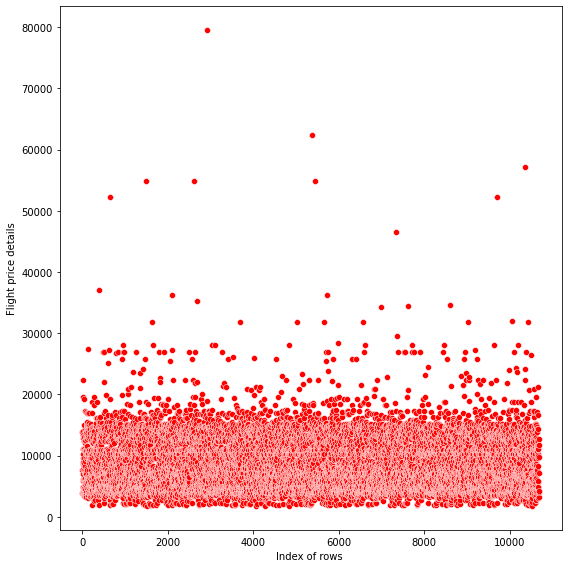

In [16]:
plt.style.use('fast')
plt.figure(figsize=(8,8))
sns.scatterplot(df.index, df['Price'],color='red')
plt.xlabel("Index of rows ")
plt.ylabel("Flight price details")
plt.tight_layout()
plt.show()

we can observe that majority of the flight price data points lie in the range 0-20000, we can alos ee some outliers are present

BarPlot

In [17]:
def count_plot(x):
    plt.figure(figsize=(10,5))
    sns.countplot(x,palette="rocket")
    plt.xticks(rotation=90)
    plt.tight_layout()
    return plt.show()


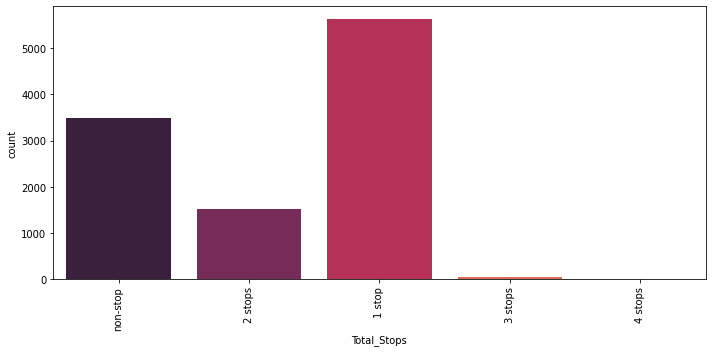

In [18]:
count_plot(df['Total_Stops'])


we can see that most of the flights have 1 stop and then there are no stop flights, we can hardly see any flights with 4 stops

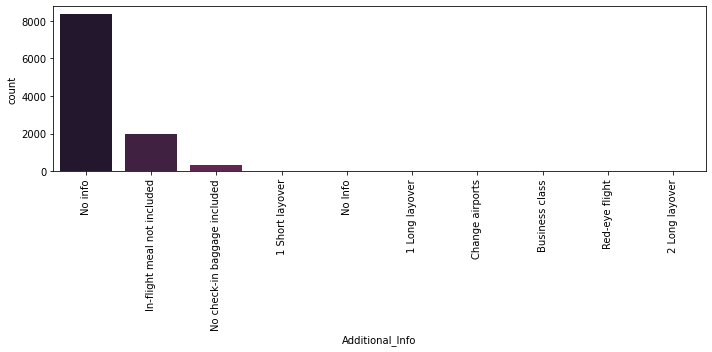

In [19]:
count_plot(df['Additional_Info'])

There is no addition info for majority of the  flights and some flights include the in flight meal not included info

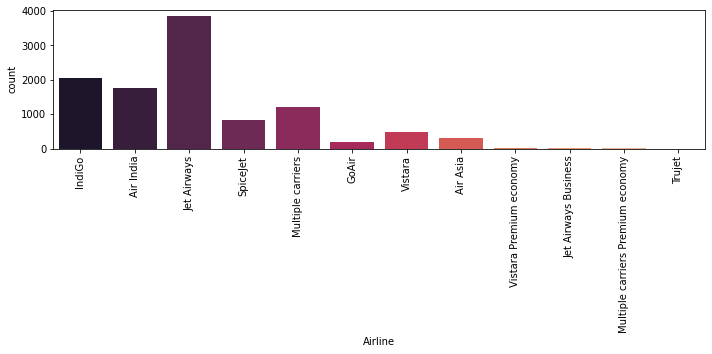

In [20]:
count_plot(df['Airline'])

we observe that jet airways has the gighest number of flights and then indigo and then air asia and so on

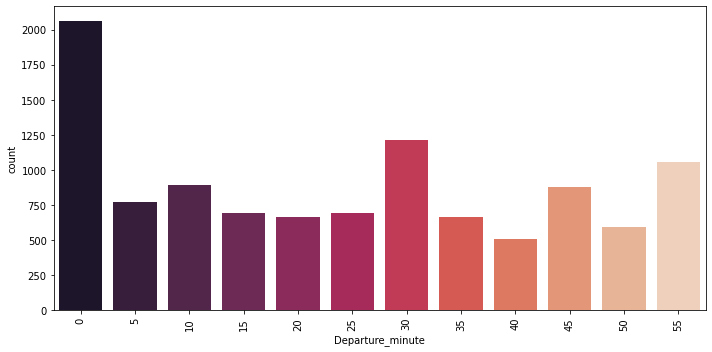

In [21]:
count_plot(df['Departure_minute'])

The departure minute column gives us the indication that most number of flights get scheduled at 0 minutes for departure

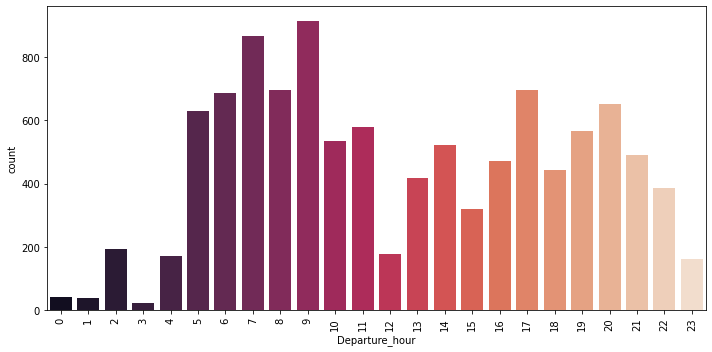

In [22]:
count_plot(df['Departure_hour'])

From the above graph we observe that the most common departure hour is 7 and 9 in the morning

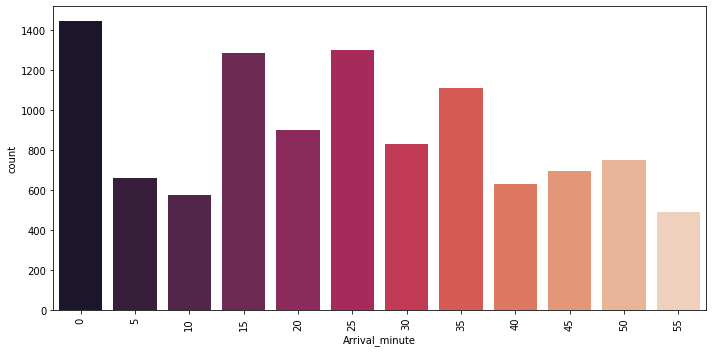

In [23]:
count_plot(df['Arrival_minute'])

The arrival minute column gives us the indication that most number of flights get scheduled at 0 minutes for arrival

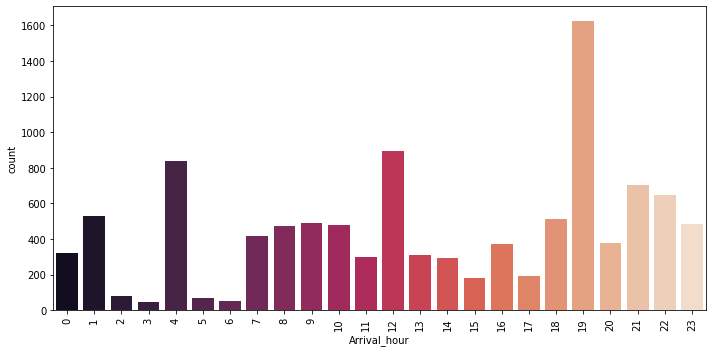

In [24]:
count_plot(df['Arrival_hour'])

we observe that the most common arrival hour is 19 hour in the evening, 2,3,5,6 hours are the least chosen

Line plot

<AxesSubplot:xlabel='Source', ylabel='Price'>

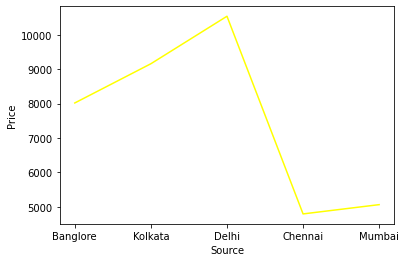

In [25]:
sns.lineplot(x='Source', y='Price', data=df, ci=None,color='yellow')

we observe that the flight prices are expensive from Delhi and cheaper from Chennai and mumbai

<AxesSubplot:xlabel='Destination', ylabel='Price'>

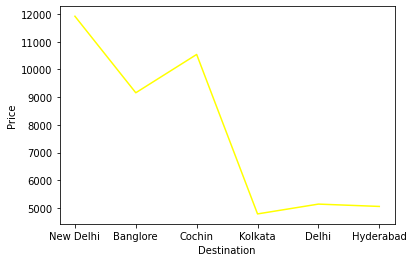

In [26]:
sns.lineplot(x='Destination', y='Price', data=df, ci=None,color='yellow')

we observe that the flights that have the destination as new delhi are expensive and cheaper for kolkata, hyderabad

<AxesSubplot:xlabel='Month_of_Journey', ylabel='Price'>

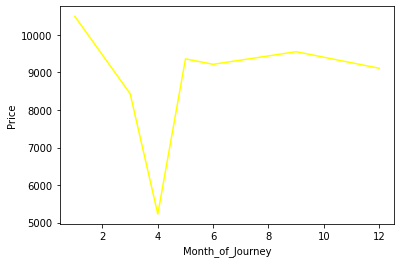

In [27]:
sns.lineplot(x='Month_of_Journey', y='Price', data=df, ci=None,color='yellow')

we can observe that the flight prices are expensive for the 1st month january , cheapest for 4th month that is april and then constant for the rest of the months

<AxesSubplot:xlabel='Day_of_Journey', ylabel='Price'>

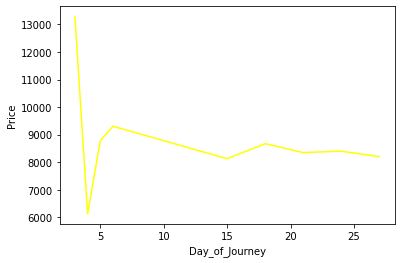

In [28]:
sns.lineplot(x='Day_of_Journey', y='Price', data=df, ci=None,color='yellow')

The prices are hig for the 2nd , 3rd day of the month and then depreciate, there is not much variation in the flight price after the 6th,7th day

<AxesSubplot:xlabel='Departure_minute', ylabel='Price'>

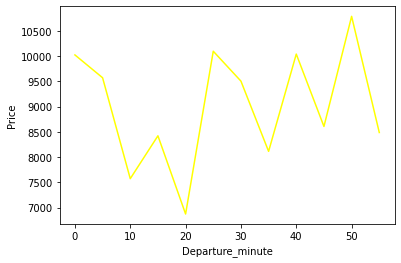

In [29]:
sns.lineplot(x='Departure_minute', y='Price', data=df, ci=None,color='yellow')

The prices keep fluctuating , then are high for the first 10 minutes and then decrease and then increase gain and then drop

<AxesSubplot:xlabel='Departure_hour', ylabel='Price'>

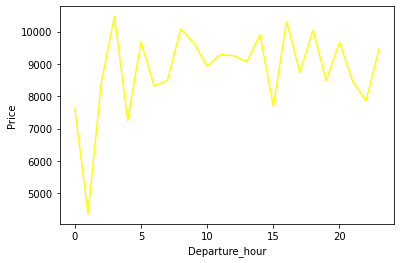

In [30]:
sns.lineplot(x='Departure_hour', y='Price', data=df, ci=None,color='yellow')

we observe that there is a spike in the first 5 departure hours and then fluctuates between 7500-10000

<AxesSubplot:xlabel='Arrival_minute', ylabel='Price'>

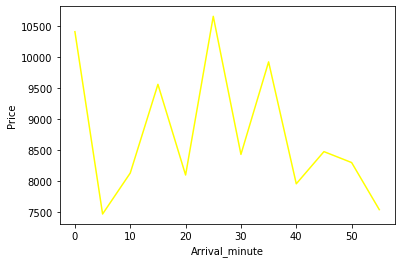

In [31]:
sns.lineplot(x='Arrival_minute', y='Price', data=df, ci=None,color='yellow')

we observe the prices are high in the first 5 mins and then fluctuate in the range 8200-10500 and then decrease in the last 40-55 minutes

<AxesSubplot:xlabel='Arrival_hour', ylabel='Price'>

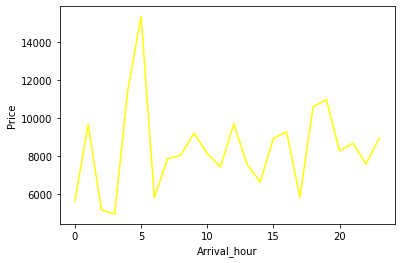

In [32]:
sns.lineplot(x='Arrival_hour', y='Price', data=df, ci=None,color='yellow')

the prices for arrival hour between 3-6 is the hghiest and then fluctuates in the price range 5000-10000

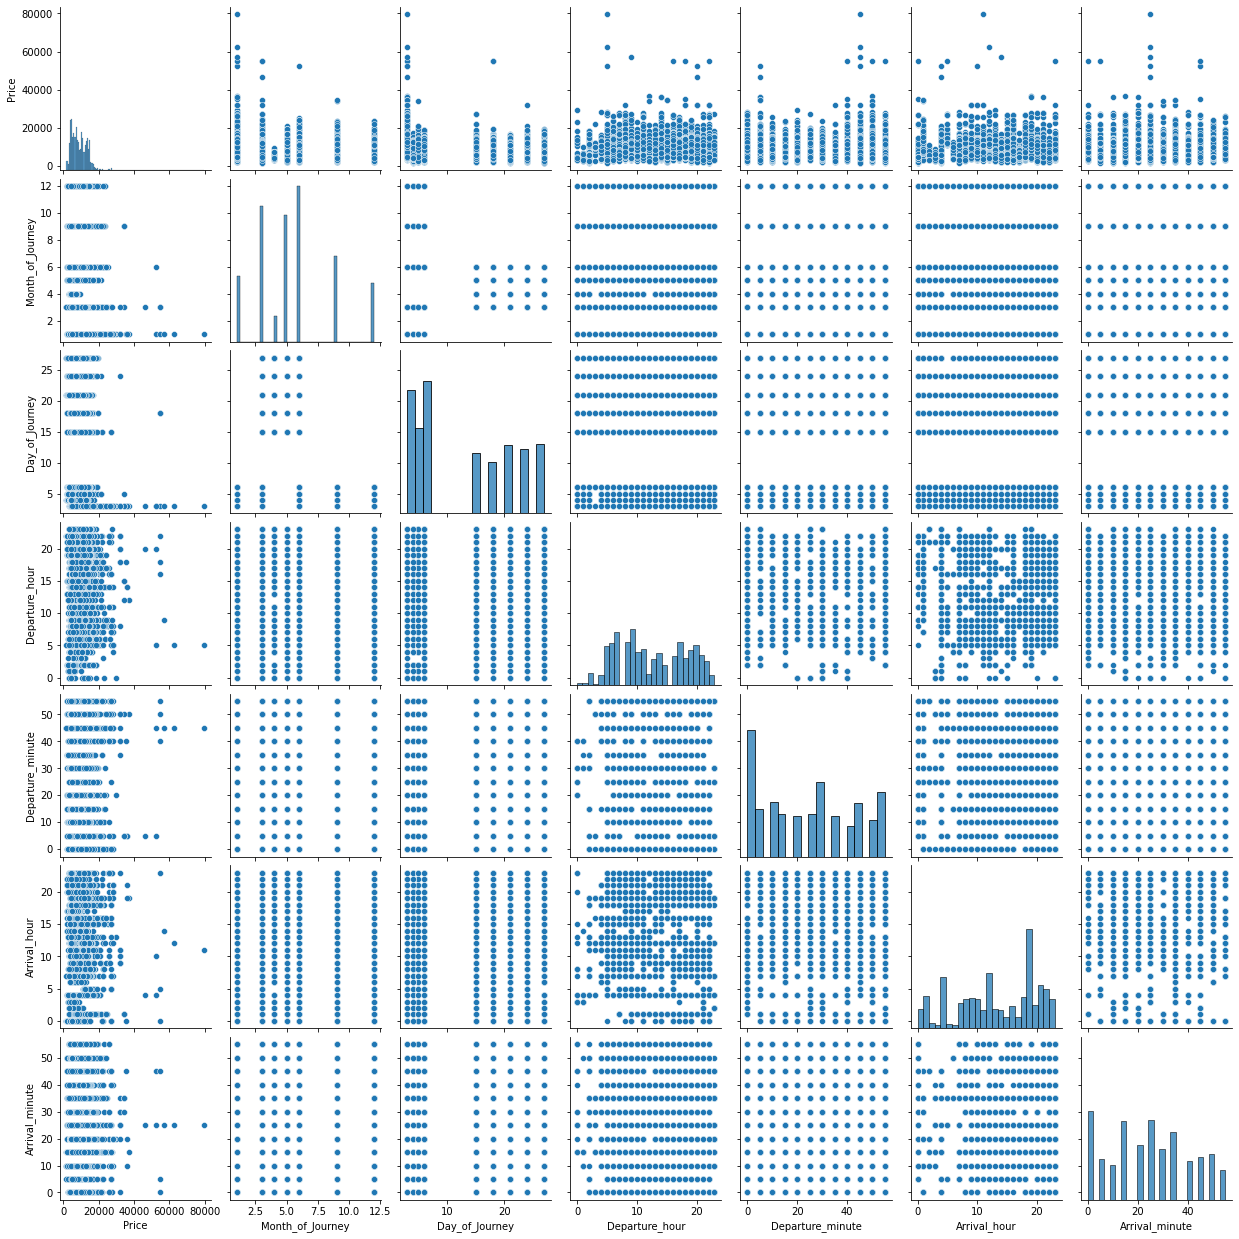

In [33]:
sns.pairplot(df)

# Encoding

i will use ordinal encoding instead of one hot coding as a lot of categories are present

In [34]:
from sklearn.preprocessing import OrdinalEncoder as OrdinalEncoder
enc=OrdinalEncoder()

for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [35]:
df

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Month_of_Journey,Day_of_Journey,Departure_hour,Departure_minute,Arrival_hour,Arrival_minute
0,3.0,0.0,5.0,4.0,8.0,3897,3,24,22,20,1,10
1,1.0,3.0,0.0,1.0,8.0,7662,1,5,5,50,13,15
2,4.0,2.0,1.0,1.0,8.0,13882,9,6,9,25,4,25
3,3.0,3.0,0.0,0.0,8.0,6218,12,5,18,5,23,30
4,3.0,0.0,5.0,0.0,8.0,13302,1,3,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0.0,3.0,0.0,4.0,8.0,4107,9,4,19,55,22,25
10679,1.0,3.0,0.0,4.0,8.0,4145,4,27,20,45,23,20
10680,4.0,0.0,2.0,4.0,8.0,7229,4,27,8,20,11,20
10681,10.0,0.0,5.0,4.0,8.0,12648,1,3,11,30,14,10


In [36]:
df.dtypes

Airline             float64
Source              float64
Destination         float64
Total_Stops         float64
Additional_Info     float64
Price                 int64
Month_of_Journey      int64
Day_of_Journey        int64
Departure_hour        int64
Departure_minute      int64
Arrival_hour          int64
Arrival_minute        int64
dtype: object

we have successfully encoded our data types to numerical datatypes

# Normal Distribution Curve

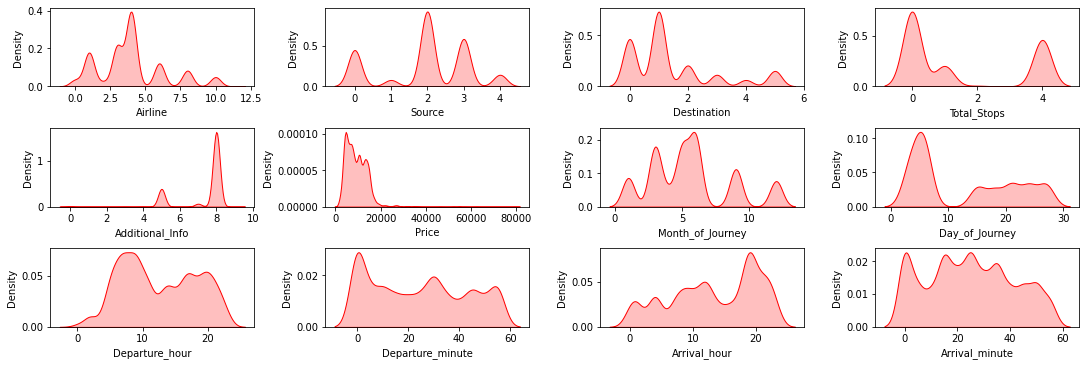

In [37]:
fig, ax = plt.subplots(ncols=4, nrows=3, figsize=(15,5))
index = 0
ax = ax.flatten()
for col, value in df.items():
    sns.distplot(value, ax=ax[index], hist=False, color="red", kde_kws={"shade": True})
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.4, h_pad=1.0)
plt.show()

we can see that skewness is present as we dont have a proper bell shaped curve

In [38]:
df.skew()

Airline             0.731057
Source             -0.424023
Destination         1.244046
Total_Stops         0.631532
Additional_Info    -1.779689
Price               1.812405
Month_of_Journey    0.629556
Day_of_Journey      0.367212
Departure_hour      0.112924
Departure_minute    0.167234
Arrival_hour       -0.370146
Arrival_minute      0.110945
dtype: float64

if we take the skewness range as (-0.5,0.5) we see that some columns have skewness, price is highly right skewed

# Boxplot

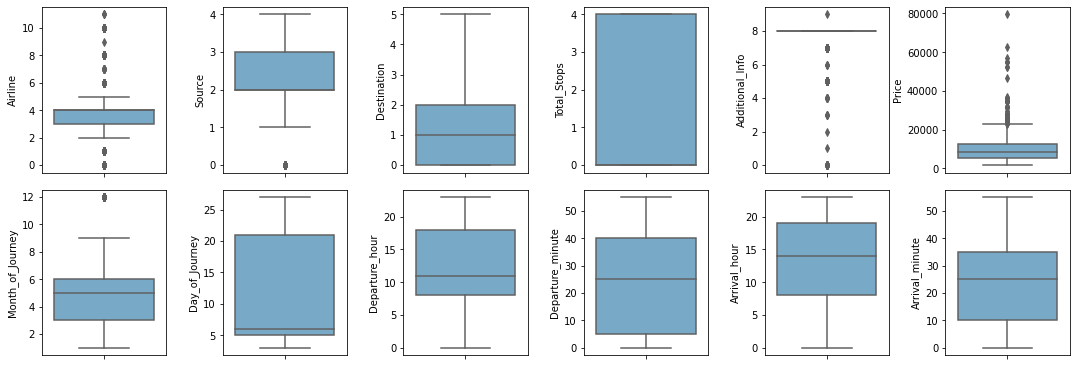

In [39]:
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(15,5))
index = 0
ax = ax.flatten()
for col, value in df.items():
    sns.boxplot(y=col, data=df, ax=ax[index], palette="Blues")
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.4, h_pad=1.0)
plt.show()

we see that outliers are present in arline column, additional_info has outliers. There are outliers in price also.

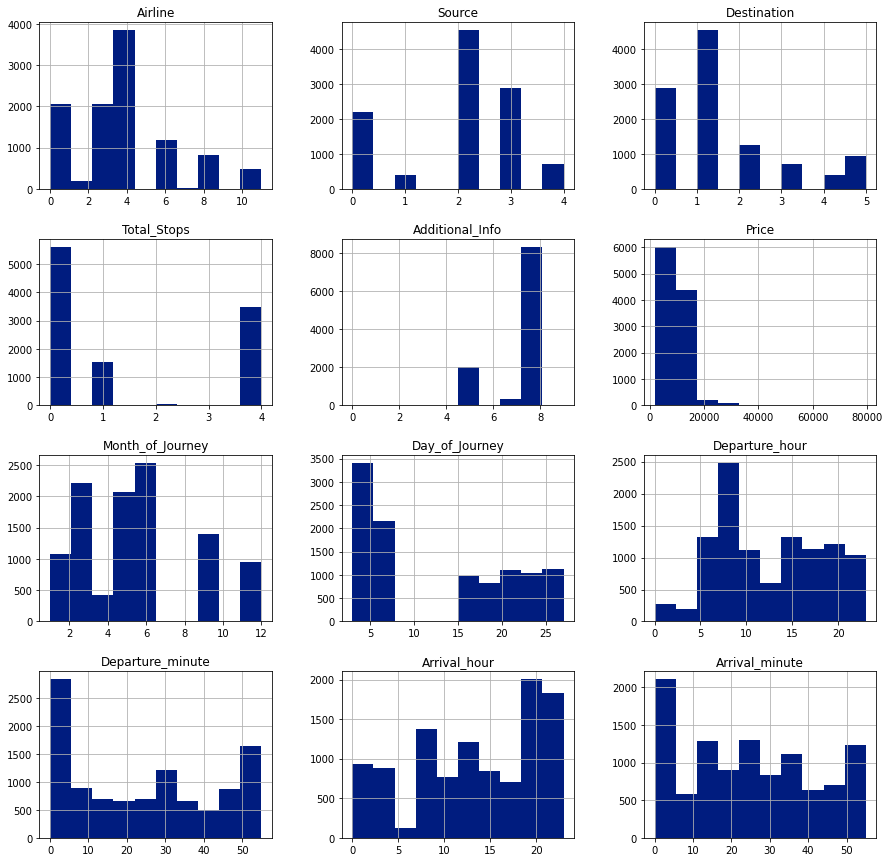

In [40]:
plt.style.use('seaborn-dark-palette')
df.hist(figsize=(15,15))
plt.show()

# Correlation

In [41]:
df.corr()['Price'].sort_values()

Total_Stops        -0.571221
Day_of_Journey     -0.165448
Arrival_minute     -0.086155
Destination        -0.071122
Additional_Info    -0.065463
Airline            -0.039565
Departure_minute   -0.024458
Departure_hour      0.006799
Month_of_Journey    0.010705
Source              0.015999
Arrival_hour        0.024244
Price               1.000000
Name: Price, dtype: float64

we can see that no high correlation values are present, therefore we will not have a problem of multicollinearity

A positive correlation means that the independent and dependent variable move in the same direction

A negative correlation indicates that the independet and dependent variables move in the opposite direction

Now let us plot a heat map to understand the correlation better

<AxesSubplot:>

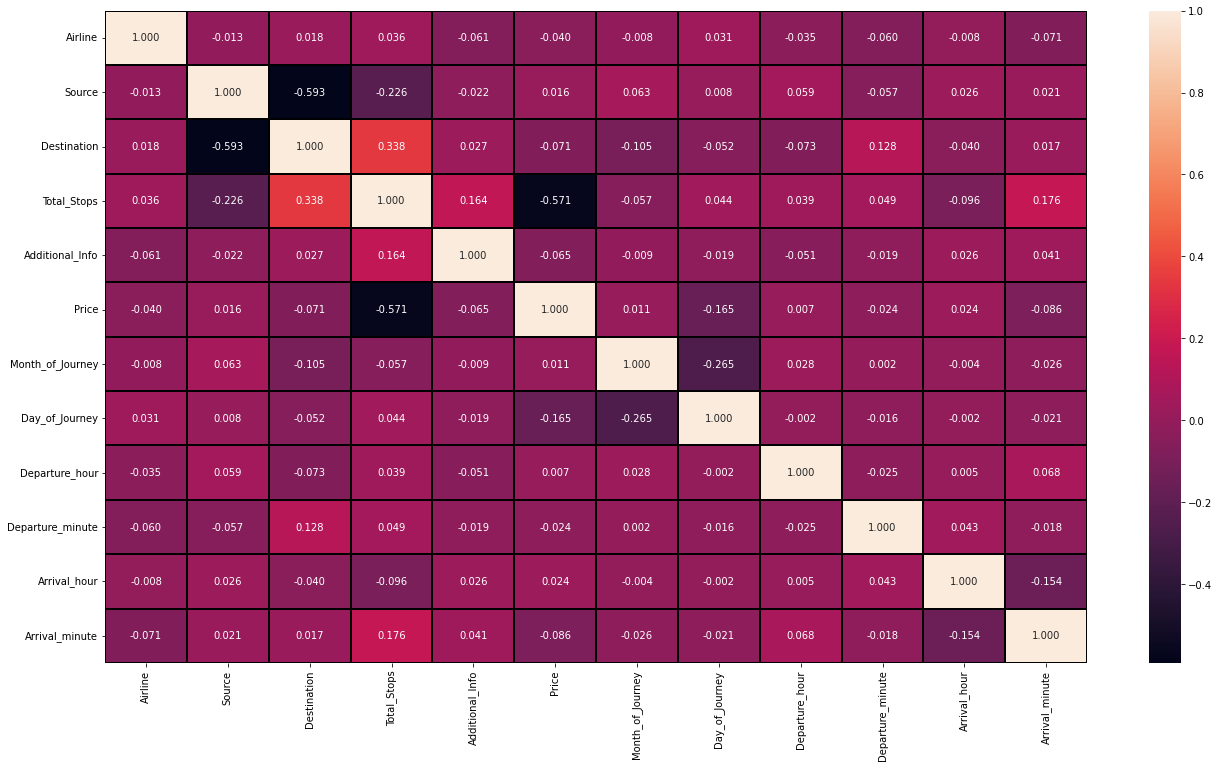

In [42]:
plt.figure(figsize=(22,12))
sns.heatmap(df.corr(),annot=True,linewidths=0.1,linecolor='black',fmt='.3f')

we have only 1 high correlation values with total_stops, nothing to worry about

# Correlation bar plot with target variable Price

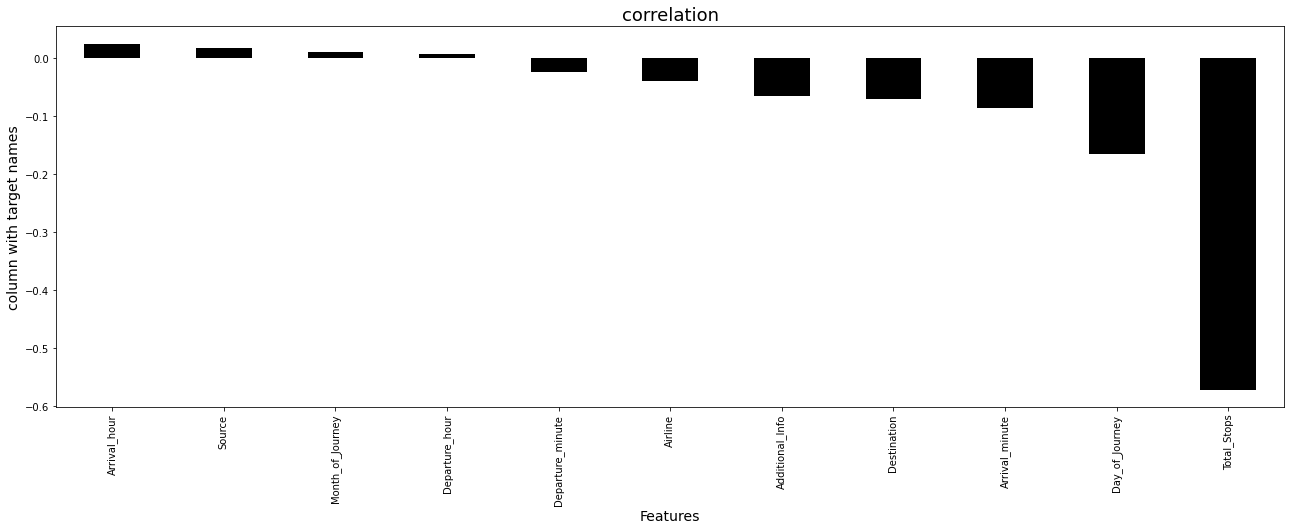

In [43]:
plt.figure(figsize=(22,7))
df.corr()['Price'].sort_values(ascending=False).drop(['Price']).plot(kind='bar',color='black')
plt.xlabel('Features',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

we have higher negatively correlated values that postive which can be clearly seen with the help the correlation bar plot

# CHECKING OUTLIERS

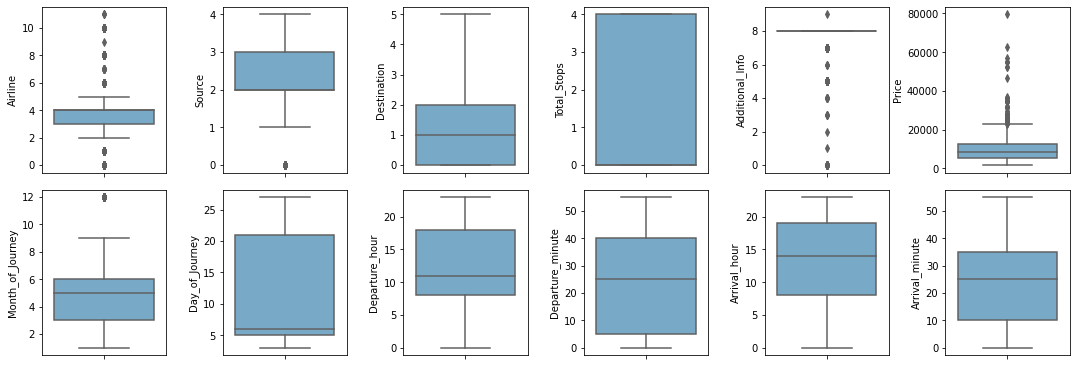

In [44]:
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(15,5))
index = 0
ax = ax.flatten()
for col, value in df.items():
    sns.boxplot(y=col, data=df, ax=ax[index], palette="Blues")
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.4, h_pad=1.0)
plt.show()

we see that ouliers are present

# Removing Outliers

In [45]:
df.shape

(10682, 12)

Applying ZScore to remove outliers

In [46]:
from scipy.stats import zscore
z=np.abs(zscore(df))
threshold=2.5
np.where(z>2.5)

(array([    7,    28,    29,    30,    57,    59,    64,    66,    75,
          112,   118,   123,   132,   177,   207,   216,   244,   248,
          250,   299,   301,   362,   370,   383,   396,   415,   426,
          429,   430,   434,   437,   469,   474,   476,   486,   498,
          508,   510,   515,   516,   544,   552,   555,   556,   586,
          597,   628,   634,   641,   644,   657,   659,   666,   692,
          709,   719,   733,   768,   769,   774,   776,   785,   785,
          793,   800,   802,   804,   813,   826,   829,   850,   898,
          906,   920,   936,   946,   959,   973,   975,   978,   994,
         1043,  1049,  1072,  1074,  1092,  1096,  1100,  1118,  1130,
         1145,  1196,  1210,  1244,  1246,  1260,  1274,  1275,  1278,
         1280,  1286,  1314,  1341,  1353,  1424,  1425,  1466,  1478,
         1485,  1545,  1560,  1579,  1609,  1629,  1654,  1712,  1713,
         1730,  1733,  1772,  1785,  1820,  1824,  1828,  1856,  1884,
      

Setting the threshold as 3

In [47]:
df_new_z=df[(z<2.5).all(axis=1)]
df_new_z

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Month_of_Journey,Day_of_Journey,Departure_hour,Departure_minute,Arrival_hour,Arrival_minute
0,3.0,0.0,5.0,4.0,8.0,3897,3,24,22,20,1,10
1,1.0,3.0,0.0,1.0,8.0,7662,1,5,5,50,13,15
2,4.0,2.0,1.0,1.0,8.0,13882,9,6,9,25,4,25
3,3.0,3.0,0.0,0.0,8.0,6218,12,5,18,5,23,30
4,3.0,0.0,5.0,0.0,8.0,13302,1,3,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...
10677,8.0,0.0,2.0,4.0,7.0,3257,5,21,5,55,8,35
10678,0.0,3.0,0.0,4.0,8.0,4107,9,4,19,55,22,25
10679,1.0,3.0,0.0,4.0,8.0,4145,4,27,20,45,23,20
10680,4.0,0.0,2.0,4.0,8.0,7229,4,27,8,20,11,20


# Percentage Data Loss

In [48]:
Data_loss=((10682-10045)/10682)*100
print(Data_loss,'%')

5.963302752293578 %


The percentage data loss is okay therefore we can proceed with our new dataframe

# Handling Skweness

In [49]:
df.skew()

Airline             0.731057
Source             -0.424023
Destination         1.244046
Total_Stops         0.631532
Additional_Info    -1.779689
Price               1.812405
Month_of_Journey    0.629556
Day_of_Journey      0.367212
Departure_hour      0.112924
Departure_minute    0.167234
Arrival_hour       -0.370146
Arrival_minute      0.110945
dtype: float64

if we take the range of skewness as (-0.5,0.5) then the columns arline, destination, Additional info, price,month of journey have skewness in them

# Applying Log Transform

In [50]:
for col in df_new_z:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])
df.skew()

Airline            -0.680164
Source             -0.424023
Destination         0.283053
Total_Stops         0.466329
Additional_Info    -1.779689
Price              -0.254592
Month_of_Journey   -0.531114
Day_of_Journey      0.367212
Departure_hour      0.112924
Departure_minute    0.167234
Arrival_hour       -0.370146
Arrival_minute      0.110945
dtype: float64

we have been successful in reducing the skewness upto some extent

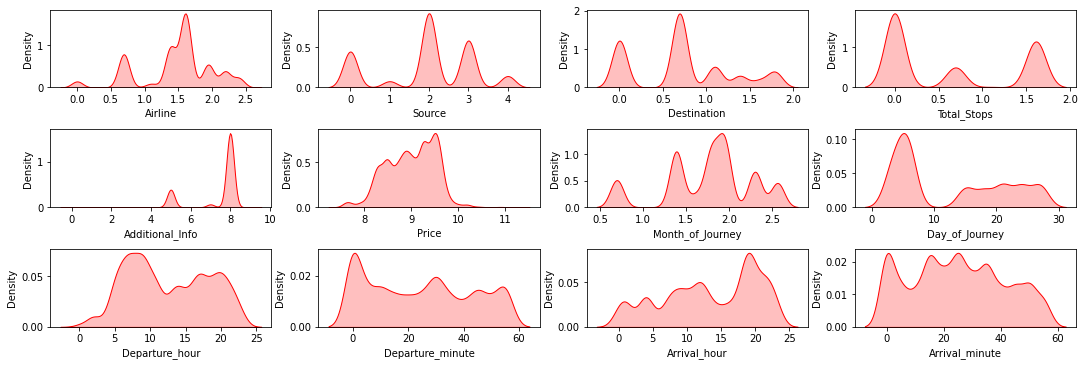

In [51]:
fig, ax = plt.subplots(ncols=4, nrows=3, figsize=(15,5))
index = 0
ax = ax.flatten()
for col, value in df.items():
    sns.distplot(value, ax=ax[index], hist=False, color="red", kde_kws={"shade": True})
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.4, h_pad=1.0)
plt.show()

# Regression model with target varaible Price

# Separating the columns into 'features' and 'targets' as 'x' and 'y'

In [52]:
x=df_new_z.drop('Price',axis=1)
y=df_new_z['Price']
print(x.shape)
print(y.shape)

(10045, 11)
(10045,)


# Feature Scaling

In [53]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-0.34059067, -1.72809897,  2.54156651, ..., -0.24868521,
        -1.77873923, -0.87368548],
       [-1.33919932,  0.88040947, -0.97312767, ...,  1.35519466,
        -0.03730206, -0.57095452],
       [ 0.15871366,  0.01090666, -0.27018883, ...,  0.01862811,
        -1.34337994,  0.03450741],
       ...,
       [-1.33919932,  0.88040947, -0.97312767, ...,  1.08788135,
         1.41389558, -0.26822355],
       [ 0.15871366, -1.72809897,  0.43275   , ..., -0.24868521,
        -0.32754159, -0.26822355],
       [-1.33919932,  0.01090666, -0.27018883, ...,  1.62250797,
         0.83341652, -0.57095452]])

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import ExtraTreesRegressor


from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV 

# Finding the best Random State

In [56]:
maxAccu=0
maxRS=0

for i in range(1, 1000):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=i)
    lr=LinearRegression()
    lr.fit(x_train, y_train)
    pred = lr.predict(x_test)
    acc_score = (r2_score(y_test, pred))*100
    
    if acc_score>maxAccu:
        maxAccu=acc_score
        maxRS=i

print("Best accuracy is", maxAccu,"at Random State", maxRS)

Best accuracy is 46.26882918770667 at Random State 939


# Linear Regression

In [57]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=939)

lr=LinearRegression()
# Training the model
lr.fit(x_train,y_train)
    
# Predicting Y_test
pred = lr.predict(x_test)
    
# RMSE - a lower RMSE score is better than a higher one
rmse = mean_squared_error(y_test, pred, squared=False)
print("RMSE Score is:", rmse)
    
# R2 score
r2 = r2_score(y_test, pred, multioutput='variance_weighted')*100
print("R2 Score is:", r2)
    
# Cross Validation Score
cv_score = (cross_val_score(lr, x, y, cv=5).mean())*100
print("Cross Validation Score:", cv_score)
    
# Result of r2 score minus cv score
result = r2 - cv_score
print("R2 Score - Cross Validation Score is", result)

RMSE Score is: 2977.731864061917
R2 Score is: 46.26882918770667
Cross Validation Score: 42.042113534209165
R2 Score - Cross Validation Score is 4.226715653497507


# Support Vector Regression

In [58]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=939)

svr=SVR()
# Training the model
lr.fit(x_train,y_train)
    
# Predicting Y_test
pred = lr.predict(x_test)
    
# RMSE - a lower RMSE score is better than a higher one
rmse = mean_squared_error(y_test, pred, squared=False)
print("RMSE Score is:", rmse)
    
# R2 score
r2 = r2_score(y_test, pred, multioutput='variance_weighted')*100
print("R2 Score is:", r2)
    
# Cross Validation Score
cv_score = (cross_val_score(lr, x, y, cv=5).mean())*100
print("Cross Validation Score:", cv_score)
    
# Result of r2 score minus cv score
result = r2 - cv_score
print("R2 Score - Cross Validation Score is", result)

RMSE Score is: 2977.731864061917
R2 Score is: 46.26882918770667
Cross Validation Score: 42.042113534209165
R2 Score - Cross Validation Score is 4.226715653497507


# Decision Tree Regressor

In [59]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=939)

dtr=DecisionTreeRegressor()
# Training the model
dtr.fit(x_train,y_train)
    
# Predicting Y_test
pred = dtr.predict(x_test)
    
# RMSE - a lower RMSE score is better than a higher one
rmse = mean_squared_error(y_test, pred, squared=False)
print("RMSE Score is:", rmse)
    
# R2 score
r2 = r2_score(y_test, pred, multioutput='variance_weighted')*100
print("R2 Score is:", r2)
    
# Cross Validation Score
cv_score = (cross_val_score(dtr, x, y, cv=5).mean())*100
print("Cross Validation Score:", cv_score)
    
# Result of r2 score minus cv score
result = r2 - cv_score
print("R2 Score - Cross Validation Score is", result)

RMSE Score is: 1319.5784339251074
R2 Score is: 89.44822441861189
Cross Validation Score: 88.58820447419295
R2 Score - Cross Validation Score is 0.8600199444189371


# RandomForestRegressor

In [60]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=256)

rfr=RandomForestRegressor()
# Training the model
rfr.fit(x_train,y_train)
    
# Predicting Y_test
pred = rfr.predict(x_test)
    
# RMSE - a lower RMSE score is better than a higher one
rmse = mean_squared_error(y_test, pred, squared=False)
print("RMSE Score is:", rmse)
    
# R2 score
r2 = r2_score(y_test, pred, multioutput='variance_weighted')*100
print("R2 Score is:", r2)
    
# Cross Validation Score
cv_score = (cross_val_score(rfr, x, y, cv=5).mean())*100
print("Cross Validation Score:", cv_score)
    
# Result of r2 score minus cv score
result = r2 - cv_score
print("R2 Score - Cross Validation Score is", result)

RMSE Score is: 1115.1075018834626
R2 Score is: 92.13997815326589
Cross Validation Score: 92.68282426843193
R2 Score - Cross Validation Score is -0.5428461151660429


# Extreme Gradient Boosting

In [61]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=256)

xgbr=XGBRegressor()
# Training the model
xgbr.fit(x_train,y_train)
    
# Predicting Y_test
pred= xgbr.predict(x_test)
    
# RMSE - a lower RMSE score is better than a higher one
rmse = mean_squared_error(y_test, pred, squared=False)
print("RMSE Score is:", rmse)
    
# R2 score
r2 = r2_score(y_test, pred, multioutput='variance_weighted')*100
print("R2 Score is:", r2)
    
# Cross Validation Score
cv_score = (cross_val_score(xgbr, x, y, cv=5).mean())*100
print("Cross Validation Score:", cv_score)
    
# Result of r2 score minus cv score
result = r2 - cv_score
print("R2 Score - Cross Validation Score is", result)

RMSE Score is: 1049.7119986846092
R2 Score is: 93.03484796056534
Cross Validation Score: 93.42407217420082
R2 Score - Cross Validation Score is -0.38922421363547244


# Extra Trees Classifier

In [62]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=256)

etr=ExtraTreesRegressor()
# Training the model
etr.fit(x_train,y_train)
    
# Predicting Y_test
pred= etr.predict(x_test)
    
# RMSE - a lower RMSE score is better than a higher one
rmse = mean_squared_error(y_test, pred, squared=False)
print("RMSE Score is:", rmse)
    
# R2 score
r2 = r2_score(y_test, pred, multioutput='variance_weighted')*100
print("R2 Score is:", r2)
    
# Cross Validation Score
cv_score = (cross_val_score(etr, x, y, cv=5).mean())*100
print("Cross Validation Score:", cv_score)
    
# Result of r2 score minus cv score
result = r2 - cv_score
print("R2 Score - Cross Validation Score is", result)

RMSE Score is: 1174.4311256450765
R2 Score is: 91.28142749606366
Cross Validation Score: 92.37645374582748
R2 Score - Cross Validation Score is -1.0950262497638192


i have chosen XGB regressor(Extreme gradient boosting) for hyperparamter tuning as it is giving a higher accuracy and the difference between the r2_score and cross validation score is better compared to models with similar accuracy

# Hyperparameter tuning on Extreme Gradient boosting

In [63]:
fmod_param = {'booster' : ['gbtree','dart','gblinear'],
              'importance_type' : ['gain','split'],
              'n_estimators' : [100,200,500],
              'eta' : [0.001, 0.01, 0.1]
             }

i have chosen the paramters after referring from the sklearn webpage

In [64]:
GSCV = GridSearchCV(xgbr, fmod_param, cv=5)

In [65]:
GSCV.fit(x_train,y_train)

[15:22:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_bylevel", "colsample_bynode", "colsample_bytree", "gamma", "interaction_constraints", "max_delta_step", "max_depth", "min_child_weight", "monotone_constraints", "num_parallel_tree", "predictor", "subsample", "tree_method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:22:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_bylevel", "colsample_bynode", "colsample_bytree", "gamma", "interaction_constraints", "max_delta_step", "max_depth", "min_child_weight", "monotone_constraints", "num_parallel_tree", "predictor", "subsample", "tree_method" } might not 

[15:22:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_bylevel", "colsample_bynode", "colsample_bytree", "gamma", "interaction_constraints", "max_delta_step", "max_depth", "min_child_weight", "monotone_constraints", "num_parallel_tree", "predictor", "subsample", "tree_method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:22:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_bylevel", "colsample_bynode", "colsample_bytree", "gamma", "interaction_constraints", "max_delta_step", "max_depth", "min_child_weight", "monotone_constraints", "num_parallel_tree", "predictor", "subsample", "tree_method" } might not 

[15:22:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_bylevel", "colsample_bynode", "colsample_bytree", "gamma", "interaction_constraints", "max_delta_step", "max_depth", "min_child_weight", "monotone_constraints", "num_parallel_tree", "predictor", "subsample", "tree_method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:22:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_bylevel", "colsample_bynode", "colsample_bytree", "gamma", "interaction_constraints", "max_delta_step", "max_depth", "min_child_weight", "monotone_constraints", "num_parallel_tree", "predictor", "subsample", "tree_method" } might not 

[15:22:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_bylevel", "colsample_bynode", "colsample_bytree", "gamma", "interaction_constraints", "max_delta_step", "max_depth", "min_child_weight", "monotone_constraints", "num_parallel_tree", "predictor", "subsample", "tree_method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:22:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_bylevel", "colsample_bynode", "colsample_bytree", "gamma", "interaction_constraints", "max_delta_step", "max_depth", "min_child_weight", "monotone_constraints", "num_parallel_tree", "predictor", "subsample", "tree_method" } might not 


[15:22:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_bylevel", "colsample_bynode", "colsample_bytree", "gamma", "interaction_constraints", "max_delta_step", "max_depth", "min_child_weight", "monotone_constraints", "num_parallel_tree", "predictor", "subsample", "tree_method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:22:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_bylevel", "colsample_bynode", "colsample_bytree", "gamma", "interaction_constraints", "max_delta_step", "max_depth", "min_child_weight", "monotone_constraints", "num_parallel_tree", "predictor", "subsample", "tree_method" } might not


[15:22:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_bylevel", "colsample_bynode", "colsample_bytree", "gamma", "interaction_constraints", "max_delta_step", "max_depth", "min_child_weight", "monotone_constraints", "num_parallel_tree", "predictor", "subsample", "tree_method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:22:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_bylevel", "colsample_bynode", "colsample_bytree", "gamma", "interaction_constraints", "max_delta_step", "max_depth", "min_child_weight", "monotone_constraints", "num_parallel_tree", "predictor", "subsample", "tree_method" } might not


[15:22:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_bylevel", "colsample_bynode", "colsample_bytree", "gamma", "interaction_constraints", "max_delta_step", "max_depth", "min_child_weight", "monotone_constraints", "num_parallel_tree", "predictor", "subsample", "tree_method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:22:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_bylevel", "colsample_bynode", "colsample_bytree", "gamma", "interaction_constraints", "max_delta_step", "max_depth", "min_child_weight", "monotone_constraints", "num_parallel_tree", "predictor", "subsample", "tree_method" } might not

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1,
                                    enable_categorical=False, gamma=0,
                                    gpu_id=-1, importance_type=None,
                                    interaction_constraints='',
                                    learning_rate=0.300000012, max_delta_step=0,
                                    max_depth=6, min_child_weight=1,
                                    missing=nan, monotone_constraints='()',
                                    n_estimators=100, n_jobs=12,
                                    num_parallel_tree=1, predictor='auto',
                                    random_state=0, reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, subsample=1,
                                    tree_method='exact', val

In [66]:
GSCV.best_params_

{'booster': 'gbtree',
 'eta': 0.001,
 'importance_type': 'gain',
 'n_estimators': 200}

In [67]:
Final_Model = XGBRegressor(booster='gbtree', eta=0.1, importance_type='gain', n_estimators=200)
Classifier = Final_Model.fit(x_train, y_train)
fmod_pred = Final_Model.predict(x_test)
fmod_r2 = r2_score(y_test, fmod_pred)*100
print("R2 score for the Best Model is:", fmod_r2)

R2 score for the Best Model is: 92.66595730460577


we have reached the hyperparamtert tuning threshold and our accuracy for the final model is 92.66%

# Linear Regression graph

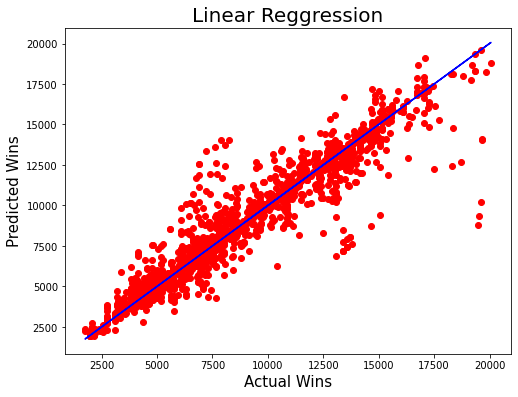

In [68]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred,color='red')
plt.plot(y_test,y_test,color='blue')
plt.xlabel('Actual Wins',fontsize=15)
plt.ylabel('Predicted Wins',fontsize=15)
plt.title('Linear Reggression',fontsize=20)
plt.show()

i can see some ouliers are still present, the accuracy can be further improved by removing outliers but we will loose too much data

# Saving the best model

In [69]:
import pickle
filename='Flight_Price_Prediction_E7.pkl'
pickle.dump(xgbr,open(filename,'wb'))

# Loading Test Data

In [70]:
df_test = pd.read_excel(r"C:\Users\benem\Desktop\ML MODELS\Flight_Ticket_Participant_Datasets\Test_set.xlsx")
df_test

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


I have imported the testing dataset now that only consists of feature columns and we need to predict the target label. However before we apply our final regression model we will need to perform all the pre processing steps that were applied on our training dataset.

In [71]:
df_test.isna().sum()


Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

luckily there is no missing data

In [72]:
df_test = date_splitting(df_test)
print(f"Rows and Columns:", df_test.shape)
df_test.head()

Rows and Columns: (2671, 10)


,Airline,Source,Destination,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Year_of_Journey,Month_of_Journey,Day_of_Journey
0,Jet Airways,Delhi,Cochin,17:30,04:25 07 Jun,1 stop,No info,2019,6,6
1,IndiGo,Kolkata,Banglore,06:20,10:20,1 stop,No info,2019,12,5
2,Jet Airways,Delhi,Cochin,19:15,19:00 22 May,1 stop,In-flight meal not included,2019,5,21
3,Multiple carriers,Delhi,Cochin,08:00,21:00,1 stop,No info,2019,5,21
4,Air Asia,Banglore,Delhi,23:55,02:45 25 Jun,non-stop,No info,2019,6,24


In [73]:
df_test = time_splitting(df_test)
print(f"Rows and Columns:", df_test.shape)
df_test.head()

Rows and Columns: (2671, 12)


,Airline,Source,Destination,Total_Stops,Additional_Info,Year_of_Journey,Month_of_Journey,Day_of_Journey,Departure_hour,Departure_minute,Arrival_hour,Arrival_minute
0,Jet Airways,Delhi,Cochin,1 stop,No info,2019,6,6,17,30,4,25
1,IndiGo,Kolkata,Banglore,1 stop,No info,2019,12,5,6,20,10,20
2,Jet Airways,Delhi,Cochin,1 stop,In-flight meal not included,2019,5,21,19,15,19,0
3,Multiple carriers,Delhi,Cochin,1 stop,No info,2019,5,21,8,0,21,0
4,Air Asia,Banglore,Delhi,non-stop,No info,2019,6,24,23,55,2,45


In [ ]:
df_test.drop("Year_of_Journey", axis=1, inplace=True)

In [80]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

for i in df_test.columns:
    if df_test[i].dtypes=='object':
        df_test[i]=enc.fit_transform(df_test[i].values.reshape(-1,1))

# feature scaling our test data 

In [82]:
df_test = pd.DataFrame(sc.fit_transform(df_test), columns=df_test.columns)

,Airline,Source,Destination,Total_Stops,Additional_Info,Month_of_Journey,Day_of_Journey,Departure_hour,Departure_minute,Arrival_hour,Arrival_minute
0,0.011908,0.032567,-0.294882,-0.792411,0.480394,0.129089,-0.703853,0.773265,0.267704,-1.361709,0.026340
1,-0.423779,0.877086,-0.976222,-0.792411,0.480394,2.101227,-0.820637,-1.161445,-0.256324,-0.509324,-0.271771
2,0.011908,0.032567,-0.294882,-0.792411,-2.148975,-0.199601,1.047909,1.125030,-0.518338,0.769252,-1.464213
3,0.883281,0.032567,-0.294882,-0.792411,0.480394,-0.199601,1.047909,-0.809679,-1.304381,1.053380,-1.464213
4,-1.730840,-1.656471,0.386458,1.435515,0.480394,0.129089,1.398262,1.828561,1.577774,-1.645837,1.218783
...,...,...,...,...,...,...,...,...,...,...,...
2666,-1.295153,0.877086,-0.976222,-0.792411,0.480394,0.129089,-0.703853,1.300913,0.267704,0.911316,0.026340
2667,-0.423779,0.877086,-0.976222,1.435515,0.480394,-0.856981,1.748614,0.245617,-0.256324,0.343060,1.815004
2668,0.011908,0.032567,-0.294882,-0.792411,0.480394,0.129089,-1.054206,1.476795,1.315760,-1.361709,0.026340
2669,-1.295153,0.032567,-0.294882,-0.792411,0.480394,0.129089,-1.054206,-1.513210,-1.304381,0.769252,-0.569881


In [84]:
predicted_values = Final_Model.predict(df_test)
data = pd.DataFrame(predicted_values, columns=['Predicted Flight Prices'])
data

,Predicted Flight Prices
0,13980.785156
1,4662.279785
2,12330.689453
3,10297.447266
4,3591.806641
...,...
2666,10276.018555
2667,5062.673340
2668,13225.029297
2669,4288.902344
